# 处理"train.csv"文件

In [40]:
import pandas as pd
titanic_data = pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
titanic_data.info()
#Age Cabin Embarked 等特征有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# 用图表查看特征分布

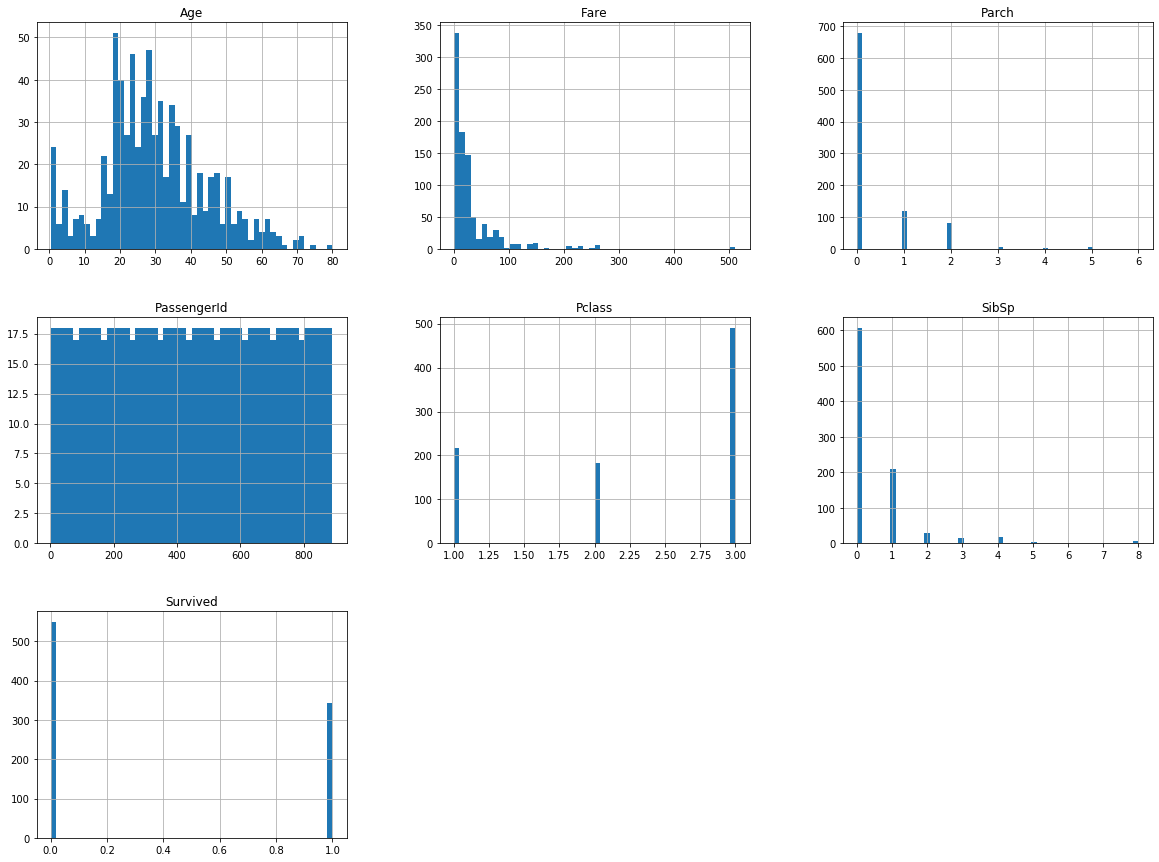

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
titanic_data.hist(bins=50, figsize=(20,15))
plt.show()
#获救人数只有300多
#3号舱人数最多

Text(0, 0.5, 'Number of people')

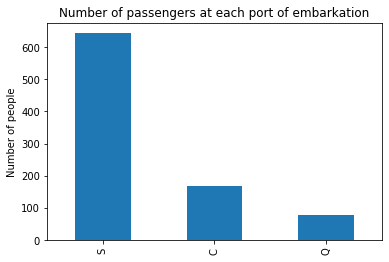

In [44]:
#各港口登船人数
titanic_data.Embarked.value_counts().plot(kind='bar')
plt.title('Number of passengers at each port of embarkation')
plt.ylabel('Number of people')
#S港口登船人数最多

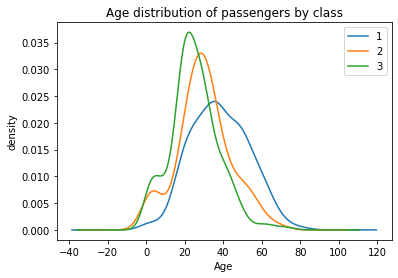

In [45]:
#不同船舱的年龄分布
titanic_data.Age[titanic_data.Pclass == 1].plot(kind='kde')
titanic_data.Age[titanic_data.Pclass == 2].plot(kind='kde')
titanic_data.Age[titanic_data.Pclass == 3].plot(kind='kde')
plt.xlabel('Age')
plt.ylabel('density')
plt.title('Age distribution of passengers by class')
plt.legend(('1','2','3'),loc='best')
#不同等级的客舱年龄分布大概一致

# 查找关联

In [46]:
corr_titanic = titanic_data.corr()
corr_titanic['Survived'].sort_values(ascending=False)
#与票价呈正相关

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Text(0, 0.5, 'Number of people')

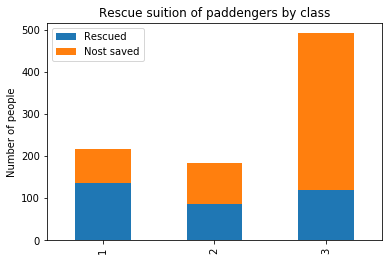

In [47]:
#不同船舱获救人数
Survived_0 = titanic_data.Pclass[titanic_data.Survived == 0].value_counts()
Survived_1 = titanic_data.Pclass[titanic_data.Survived == 1].value_counts()
df = pd.DataFrame({'Rescued':Survived_1,'Nost saved':Survived_0})
df.plot(kind='bar',stacked=True)
plt.title('Rescue suition of paddengers by class')
plt.ylabel('Number of people')
#1号舱获救比例更高

Text(0, 0.5, 'Number of people')

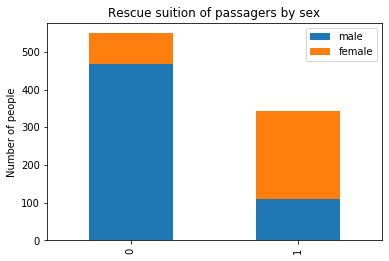

In [48]:
#不同性别的获救情况
Survived_male = titanic_data.Survived[titanic_data.Sex == 'male'].value_counts()
Survived_female = titanic_data.Survived[titanic_data.Sex == 'female'].value_counts()
df = pd.DataFrame({'male':Survived_male,'female':Survived_female})
df.plot(kind='bar',stacked=True)
plt.title('Rescue suition of passagers by sex')
plt.ylabel('Number of people')
#女性获救更多

Text(0.5, 0, 'port')

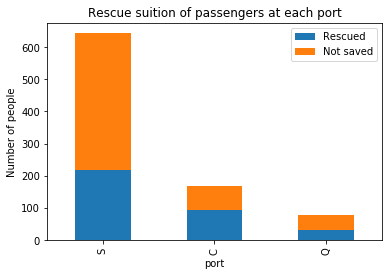

In [49]:
#不同登船口岸获救人数
Survived_0 = titanic_data.Embarked[titanic_data.Survived == 0].value_counts()
Survived_1 = titanic_data.Embarked[titanic_data.Survived == 1].value_counts()
df = pd.DataFrame({'Rescued':Survived_1,'Not saved':Survived_0})
df.plot(kind='bar',stacked=True)
plt.title('Rescue suition of passengers at each port')
plt.ylabel('Number of people')
plt.xlabel('port')
#s口岸登船人数最多，获救人数也最多

Text(0, 0.5, 'Number of people')

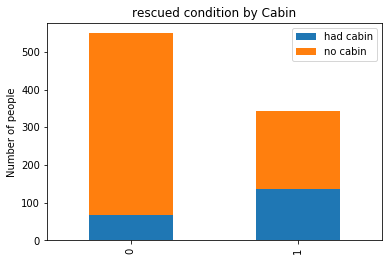

In [50]:
Survived_cabin = titanic_data.Survived[pd.notnull(titanic_data.Cabin)].value_counts()
Survived_nocabin = titanic_data.Survived[pd.isnull(titanic_data.Cabin)].value_counts()
df = pd.DataFrame({'had cabin':Survived_cabin,'no cabin':Survived_nocabin})
df.plot(kind='bar',stacked=True)
plt.title('rescued condition by Cabin')
plt.ylabel('Number of people')
#有Cabin的生存人数更多

# 特征工程

In [51]:
#用随机森林拟合Age特征
from sklearn.ensemble import RandomForestRegressor

def set_missing_ages(df):
    age_df = df[['Age','Fare','Parch','SibSp','Pclass']]#把已有的数值型特征取出来
   
    known_age = age_df[age_df.Age.notnull()].to_numpy()
    unknown_age = age_df[age_df.Age.isnull()].to_numpy()#乘客分成已知年龄和未知年龄两部分
    
    x = known_age[:,1:]
    y = known_age[:,0]#把已知年龄部分分成特征与标签
    
    rfr = RandomForestRegressor(random_state=0,n_estimators=2000,n_jobs=-1)
    rfr.fit(x,y)#用随机森林模型拟合
    
    predictedAges = rfr.predict(unknown_age[:,1::])#用得到的模型进行未知年龄的预测
    
    df.loc[(df.Age.isnull()),'Age'] = predictedAges
    
    return df,rfr

def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()),'Cabin'] = 'Yes'
    df.loc[(df.Cabin.isnull()),'Cabin'] = 'No'
    return df

titanic_data,rfr = set_missing_ages(titanic_data)
titanic_data = set_Cabin_type(titanic_data)

In [52]:
#对Cabin 因子化
import pandas as pd
dummies_Cabin = pd.get_dummies(titanic_data['Cabin'],prefix='Cabin')
dummies_Embarked = pd.get_dummies(titanic_data['Embarked'],prefix='Embarked')
dummies_Sex = pd.get_dummies(titanic_data['Sex'],prefix='Sex')
dummies_Pclass = pd.get_dummies(titanic_data['Pclass'],prefix='Pclass')
df = pd.concat([titanic_data,dummies_Cabin,dummies_Embarked,dummies_Pclass,dummies_Sex],axis=1)
df.drop(['Pclass','Name','Sex','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [53]:
#对Age Fare 缩放
import sklearn.preprocessing as preprocessing
import numpy as np
Age_1d = np.array(df['Age']).reshape(1, -1)
scaler = preprocessing.StandardScaler().fit(Age_1d)
df['Age_scaled'] = scaler.fit_transform(np.array(df['Age']).reshape(-1,1))  
Fare_1d = np.array(df['Fare']).reshape(1, -1)
scaler = preprocessing.StandardScaler().fit(Fare_1d)
df['Fare_scaled'] = scaler.fit_transform(np.array(df['Fare']).reshape(-1,1))  
df.drop(['Age','Fare','PassengerId'],axis=1,inplace=True)

In [54]:
corr_titanic = df.corr()
corr_titanic['Survived'].sort_values(ascending=False)
#查看相关矩阵，关联程度有所提高
#female会提高获救概率，male会降低获救概率
#1等仓会提高获救概率
#Age特征呈现负相关
#统计图显示S港口获救高，但呈负相关

Survived       1.000000
Sex_female     0.543351
Cabin_Yes      0.316912
Pclass_1       0.285904
Fare_scaled    0.257307
Embarked_C     0.168240
Pclass_2       0.093349
Parch          0.081629
Embarked_Q     0.003650
SibSp         -0.035322
Age_scaled    -0.054519
Embarked_S    -0.155660
Cabin_No      -0.316912
Pclass_3      -0.322308
Sex_male      -0.543351
Name: Survived, dtype: float64

In [55]:
titanic_feature = df.drop("Survived", axis=1)#Divide the data into targets and features
titanic_target = df['Survived']
from sklearn.model_selection import train_test_split#Divide the data into test and training sets
x1,x2,y1,y2 = train_test_split(titanic_feature,titanic_target,test_size=0.2, random_state=40)

# 逻辑回归建模

In [56]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1.0, penalty='l1', tol=1e-6,solver='liblinear')
model.fit(x1,y1)
y2_model = model.predict(x2)
from sklearn.metrics import accuracy_score#Model score
y2_model = model.fit(x1, y1).predict(x2)
y1_model = model.fit(x2, y2).predict(x1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.7935393258426966, 0.8268156424581006)

# 处理'test.csv'文件

In [57]:
test_data = pd.read_csv('test.csv')
test_data.loc[(test_data.Fare.isnull()),'Fare'] = 0
tmp_df = test_data[['Age','Fare','Parch','SibSp','Pclass']]
null_age = tmp_df[test_data.Age.isnull()].to_numpy()

x = null_age[:,1:]
predictedAges = rfr.predict(x)
test_data.loc[(test_data.Age.isnull()),'Age'] = predictedAges

test_data = set_Cabin_type(test_data)
dummies_Cabin = pd.get_dummies(test_data['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(test_data['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(test_data['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(test_data['Pclass'], prefix= 'Pclass')

df_test = pd.concat([test_data, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(np.array(df_test['Age']).reshape(-1,1))
df_test['Fare_scaled'] = scaler.fit_transform(np.array(df_test['Fare']).reshape(-1,1))
df_test.head()

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.5,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307521,-0.496637
1,893,47.0,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256241,-0.511497
2,894,62.0,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394706,-0.463335
3,895,27.0,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261711,-0.481704
4,896,22.0,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641199,-0.416740


# Bagging

In [62]:
from sklearn.ensemble import BaggingClassifier
clf = LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
bagging_model = BaggingClassifier(clf, n_estimators=20, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)
bagging_model.fit(titanic_feature,titanic_target)
test = df_test.drop(['Age','Fare','PassengerId'],axis=1,inplace=True)
predictions = bagging_model.predict(test)

In [ ]:
result = pd.DataFrame({'PassengerId':test_data['PassengerId'].to_numpy(), 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions.csv", index=False)#把结果写入文件